In [1]:
import geopandas as gpd
import pandas as pd
import folium 
from folium import plugins
import rioxarray as rxr
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
import os
import numpy as np

/Users/samueltaylor/Documents/GitHub/PHA_burn_severity/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


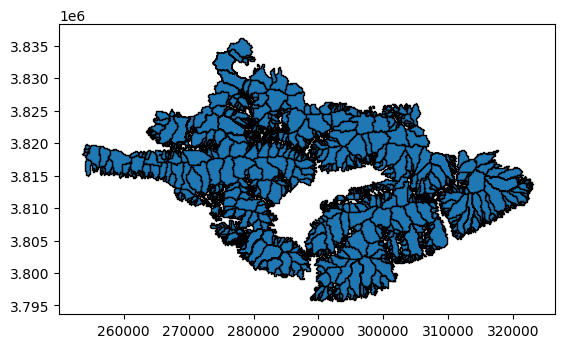

In [2]:
#FIGURE 1: Showing the design storm polygons


all_b = r'/Volumes/PhD/imagery/masters/output/ROC/design_storm/M1_design_storm.shp'
all_b = gpd.read_file(all_b)
all_b.plot(edgecolor='black')
all_b = all_b.to_crs(epsg=4326)

In [4]:
bimodal = r'/Volumes/PhD/imagery/masters/output/normality/bimodal_basins.csv'
skewed = r'/Volumes/PhD/imagery/masters/output/normality/skewed_basins.csv'
bimodal = pd.read_csv(bimodal)
skewed = pd.read_csv(skewed)
all_b

,BASIN_ID,Shape_Leng,Shape_Area,Segment_ID,Acc_Cl,Perim_Buff,InsidePeri,OutsidePer,Fire_ID,Fire_Segme,...,VolMax,VolCl,VolCl_Lege,CombHaz,CombHazCl,CombHazCl_,Mean_dNBR,Med_dNBR,PF_dNBR,geometry
0,123,16060.0,6.322700e+06,123,1.0,10,0,0,thm2017,thm2017_123,...,21913.681981,2,"1,000-10,000",3,1,Low,0.135826,0.068758,0.042093,"POLYGON ((-119.41916 34.61662, -119.41948 34.6..."
1,155,3140.0,2.716000e+05,155,1.0,10,101,12,thm2017,thm2017_155,...,5778.452255,1,"<1,000",2,1,Low,0.260572,0.151689,0.063711,"POLYGON ((-119.41603 34.61776, -119.41559 34.6..."
2,167,1800.0,7.260000e+04,167,1.0,10,100,11,thm2017,thm2017_167,...,2487.910872,1,"<1,000",2,1,Low,0.317980,0.271129,0.140899,"MULTIPOLYGON (((-119.39965 34.61718, -119.3996..."
3,172,2720.0,2.340000e+05,172,1.0,10,101,12,thm2017,thm2017_172,...,5264.721728,1,"<1,000",2,1,Low,0.362372,0.296424,0.126700,"MULTIPOLYGON (((-119.40306 34.61829, -119.4030..."
4,184,1540.0,4.900000e+04,184,1.0,10,100,11,thm2017,thm2017_184,...,2558.630747,1,"<1,000",3,1,Low,0.567295,0.592624,0.610778,"MULTIPOLYGON (((-119.39921 34.61692, -119.3991..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,44218,2880.0,2.577000e+05,44218,1.0,10,100,11,thm2017,thm2017_44218,...,1214.373749,1,"<1,000",2,1,Low,0.109455,0.073427,0.030402,"POLYGON ((-119.23365 34.28937, -119.23367 34.2..."
1732,44238,6260.0,8.933000e+05,44238,1.0,10,100,0,thm2017,thm2017_44238,...,3296.553573,1,"<1,000",2,1,Low,0.176968,0.177423,0.186665,"POLYGON ((-119.1948 34.29503, -119.19482 34.29..."
1733,44256,1140.0,3.360000e+04,44256,1.0,10,100,11,thm2017,thm2017_44256,...,843.102171,1,"<1,000",2,1,Low,0.289667,0.279276,0.260739,"MULTIPOLYGON (((-119.18725 34.29282, -119.1871..."
1734,44320,3020.0,1.722000e+05,44320,1.0,10,0,0,thm2017,thm2017_44320,...,6021.325097,1,"<1,000",3,1,Low,0.542320,0.526273,0.466265,"POLYGON ((-119.29049 34.28642, -119.2905 34.28..."


In [8]:
#subset all_b by the bimodal and skewed basins
bimodal_b = all_b[all_b['BASIN_ID'].isin(bimodal['Basin_ID'])]
skewed_b = all_b[all_b['BASIN_ID'].isin(skewed['Basin_ID'])]

#bimodal_b.plot(edgecolor='black', color='blue', alpha=0.5, label='Bimodal Basins')
#skewed_b.plot(edgecolor='black', color='red', alpha=0.5, label='Skewed Basins')

#save the bimodal and skewed basins to shapefiles
bimodal_b.to_file(r'/Volumes/PhD/imagery/masters/output/normality/bimodal_basins.shp')
skewed_b.to_file(r'/Volumes/PhD/imagery/masters/output/normality/skewed_basins.shp')



<Axes: >

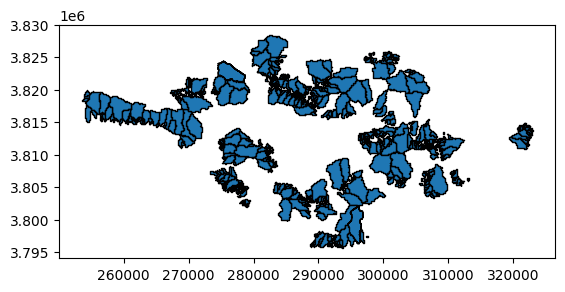

In [10]:
sub_b = r'/Volumes/PhD/imagery/masters/output/ROC/M1_CT_ROC.shp'
sub_b = gpd.read_file(sub_b)
sub_b.plot(edgecolor='black')

In [12]:
mont_b =r'/Volumes/PhD/imagery/masters/hyper/ma_data.csv'
mont_b = pd.read_csv(mont_b)


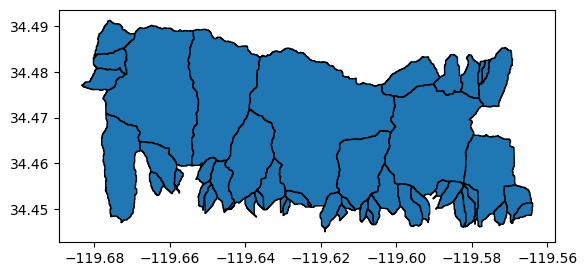

In [43]:
hyp_b = all_b[all_b['BASIN_ID'].isin(mont_b['basin_id'])]
hyp_b.plot(edgecolor='black')

# save hyp_b to a new shapefile
out = r'/Volumes/PhD/imagery/masters/hyper/'
hyp_b.to_file(os.path.join(out, 'Mont_basins.shp'), driver='ESRI Shapefile')


In [27]:
center = [all_b.geometry.centroid.y.mean(), all_b.geometry.centroid.x.mean()]
m = folium.Map(location=center, zoom_start=10)

# 4. Add shapefile as GeoJson
folium.GeoJson(all_b).add_to(m)

/var/folders/mm/sjj0b1k91z39pkxfzn0rj_1h0000gn/T/ipykernel_43288/230904092.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = [all_b.geometry.centroid.y.mean(), all_b.geometry.centroid.x.mean()]


In [21]:
# load raster basemap, plot it, add shapefile on top
stacked = []
TF = r'/Volumes/PhD/imagery/masters/sentinel-2/S2B_MSIL2A_20171228T184749_N0500_R070_T11SKU_20230808T002939.SAFE/S2B_MSIL2A_20171228T184749_N0500_R070_T11SKU_20230808T002939.SAFE/GRANULE/L2A_T11SKU_A004243_20171228T184751/IMG_DATA/R20m/'
for f in os.listdir(TF):
    print(f)
    if f.__contains__('B'):
        with rio.open(os.path.join(TF, f)) as src:
            stacked.append(src.read(1)) 





T11SKU_20171228T184749_AOT_20m.jp2
T11SKU_20171228T184749_B01_20m.jp2
T11SKU_20171228T184749_B02_20m.jp2
T11SKU_20171228T184749_B03_20m.jp2
T11SKU_20171228T184749_B04_20m.jp2
T11SKU_20171228T184749_B05_20m.jp2
T11SKU_20171228T184749_B06_20m.jp2
T11SKU_20171228T184749_B07_20m.jp2
T11SKU_20171228T184749_B11_20m.jp2
T11SKU_20171228T184749_B12_20m.jp2
T11SKU_20171228T184749_B8A_20m.jp2
T11SKU_20171228T184749_SCL_20m.jp2
T11SKU_20171228T184749_TCI_20m.jp2
T11SKU_20171228T184749_WVP_20m.jp2


[array([[2124, 3560, 3927, ..., 1346, 1155,  393],
       [3540, 5576, 6100, ..., 2510, 2240, 1157],
       [3862, 6043, 6619, ..., 2809, 2514, 1350],
       ...,
       [ 514, 1304, 1506, ..., 1789, 1610,  844],
       [ 435, 1121, 1310, ..., 1602, 1423,  685],
       [ 435,  435,  520, ...,  829,  676,  484]], dtype=uint16), array([[4402, 4393, 4520, ..., 2534, 2534, 2520],
       [4406, 4345, 4419, ..., 2512, 2527, 2530],
       [4384, 4308, 4422, ..., 2468, 2483, 2514],
       ...,
       [1140, 1138, 1122, ..., 1406, 1524, 1869],
       [1140, 1127, 1132, ..., 1610, 1748, 1840],
       [1145, 1128, 1127, ..., 1895, 1649, 1530]], dtype=uint16), array([[4491, 4515, 4523, ..., 2738, 2797, 2755],
       [4360, 4412, 4389, ..., 2735, 2769, 2773],
       [4149, 4264, 4278, ..., 2710, 2725, 2739],
       ...,
       [1047, 1045, 1058, ..., 1601, 1728, 2199],
       [1061, 1056, 1048, ..., 1812, 1970, 2035],
       [1058, 1050, 1056, ..., 2131, 1739, 1693]], dtype=uint16), array([[4538, 4

In [25]:
img = np.stack(stacked)

In [28]:
img = img / 10000
img

array([[[2.124e-05, 3.560e-05, 3.927e-05, ..., 1.346e-05, 1.155e-05,
         3.930e-06],
        [3.540e-05, 5.576e-05, 6.100e-05, ..., 2.510e-05, 2.240e-05,
         1.157e-05],
        [3.862e-05, 6.043e-05, 6.619e-05, ..., 2.809e-05, 2.514e-05,
         1.350e-05],
        ...,
        [5.140e-06, 1.304e-05, 1.506e-05, ..., 1.789e-05, 1.610e-05,
         8.440e-06],
        [4.350e-06, 1.121e-05, 1.310e-05, ..., 1.602e-05, 1.423e-05,
         6.850e-06],
        [4.350e-06, 4.350e-06, 5.200e-06, ..., 8.290e-06, 6.760e-06,
         4.840e-06]],

       [[4.402e-05, 4.393e-05, 4.520e-05, ..., 2.534e-05, 2.534e-05,
         2.520e-05],
        [4.406e-05, 4.345e-05, 4.419e-05, ..., 2.512e-05, 2.527e-05,
         2.530e-05],
        [4.384e-05, 4.308e-05, 4.422e-05, ..., 2.468e-05, 2.483e-05,
         2.514e-05],
        ...,
        [1.140e-05, 1.138e-05, 1.122e-05, ..., 1.406e-05, 1.524e-05,
         1.869e-05],
        [1.140e-05, 1.127e-05, 1.132e-05, ..., 1.610e-05, 1.748e-05,
   

In [29]:
#normalize data
norm_img = (img - img.min()) / (img.max() - img.min())


In [30]:
norm_img

array([[[0.11301479, 0.18942216, 0.20894966, ..., 0.0716186 ,
         0.06145578, 0.02091093],
        [0.18835799, 0.29669043, 0.32457167, ..., 0.13355326,
         0.11918697, 0.0615622 ],
        [0.20549111, 0.32153879, 0.35218687, ..., 0.14946259,
         0.1337661 , 0.07183144],
        ...,
        [0.02734915, 0.06938385, 0.08013196, ..., 0.09518995,
         0.08566564, 0.04490795],
        [0.02314568, 0.0596467 , 0.0697031 , ..., 0.08523997,
         0.07571565, 0.0364478 ],
        [0.02314568, 0.02314568, 0.0276684 , ..., 0.04410982,
         0.03596893, 0.0257529 ]],

       [[0.23422369, 0.23374481, 0.24050229, ..., 0.13483026,
         0.13483026, 0.13408535],
        [0.23443652, 0.23119081, 0.23512823, ..., 0.13365968,
         0.13445781, 0.13461743],
        [0.23326594, 0.22922209, 0.23528786, ..., 0.13131851,
         0.13211663, 0.1337661 ],
        ...,
        [0.06065766, 0.06055124, 0.0596999 , ..., 0.07481111,
         0.08108971, 0.09944663],
        [0.0

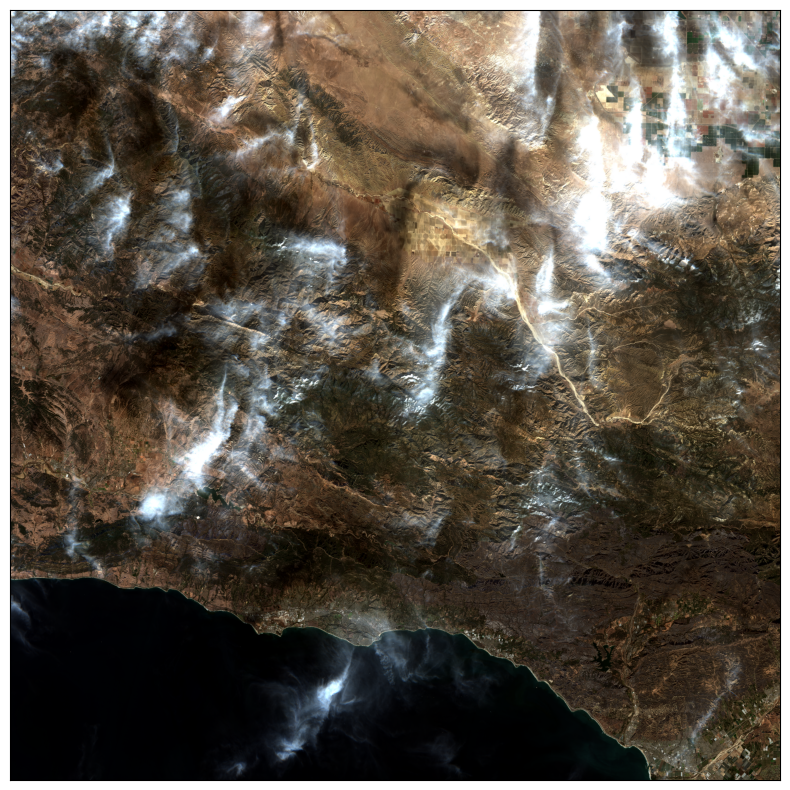

In [37]:
rgb = ep.plot_rgb(
    arr = img,
    rgb = (3, 2, 1),  # Red, Green, Blue bands
    stretch= True,
    figsize = (10, 10)
)
plt.show()

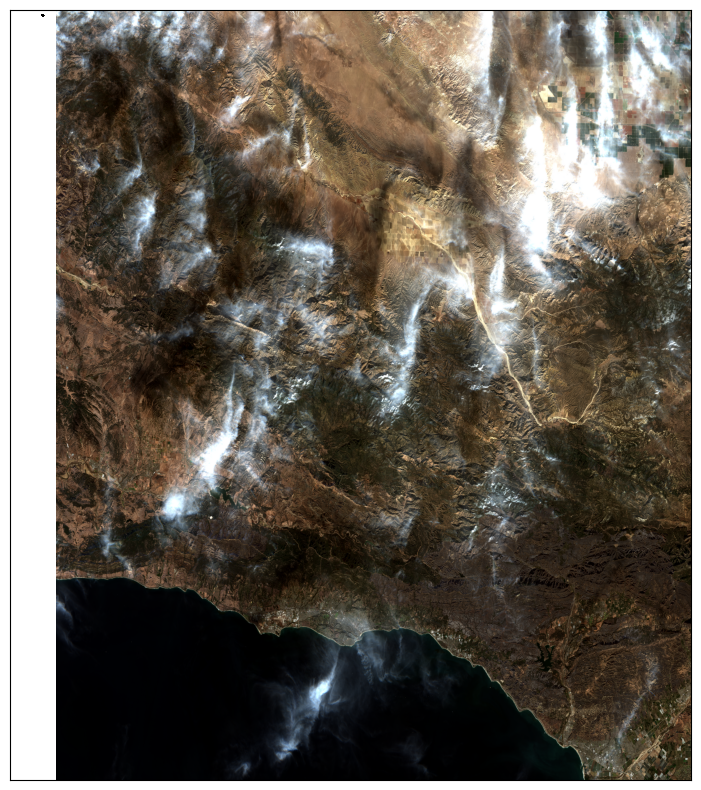

In [42]:
#plot all data together
fig, ax = plt.subplots(figsize=(10, 10))

ep.plot_rgb(
    arr = img,
    rgb = (3, 2, 1),  # Red, Green, Blue bands
    stretch= True,
    ax=ax
)
# Add the shapefile to the plot on top of the RGB image
all_b.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

plt.show()

In [ ]:
#adding a comment
#any code or comments that I write and save will be added to the notebook
#this is a new comment
#this is another comment